В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv('/content/drive/MyDrive/ML/cars.csv')

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [42]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [43]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [45]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [46]:
# Перевірка пропущених значень
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

,0


In [47]:
# Аналіз унікальних значень
for col in df.columns:
    unique_vals = df[col].nunique()
    if unique_vals < 10:
        print(f"🔹 {col}: {df[col].unique()}")

🔹 Year: [2018 2019 2017 2020 2016 2021]
🔹 Fuel_Type: ['Petrol' 'Diesel']
🔹 Transmission: ['Manual' 'Automatic']
🔹 Owner_Type: ['First' 'Second' 'Third']
🔹 Seats: [5 4 7]


In [48]:
# Категоріальні vs числові
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("🔹 Категоріальні:", cat_cols)
print("🔹 Числові:", num_cols)

🔹 Категоріальні: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
🔹 Числові: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


Висновок:

У наборі даних:

10 числових колонок, 5 категоріальних

З них:

2 бінарні (Transmission, Fuel_Type)

2 впорядковані (Year, Seats)

Інші 3–4 — номінативні багатокатегоріальні

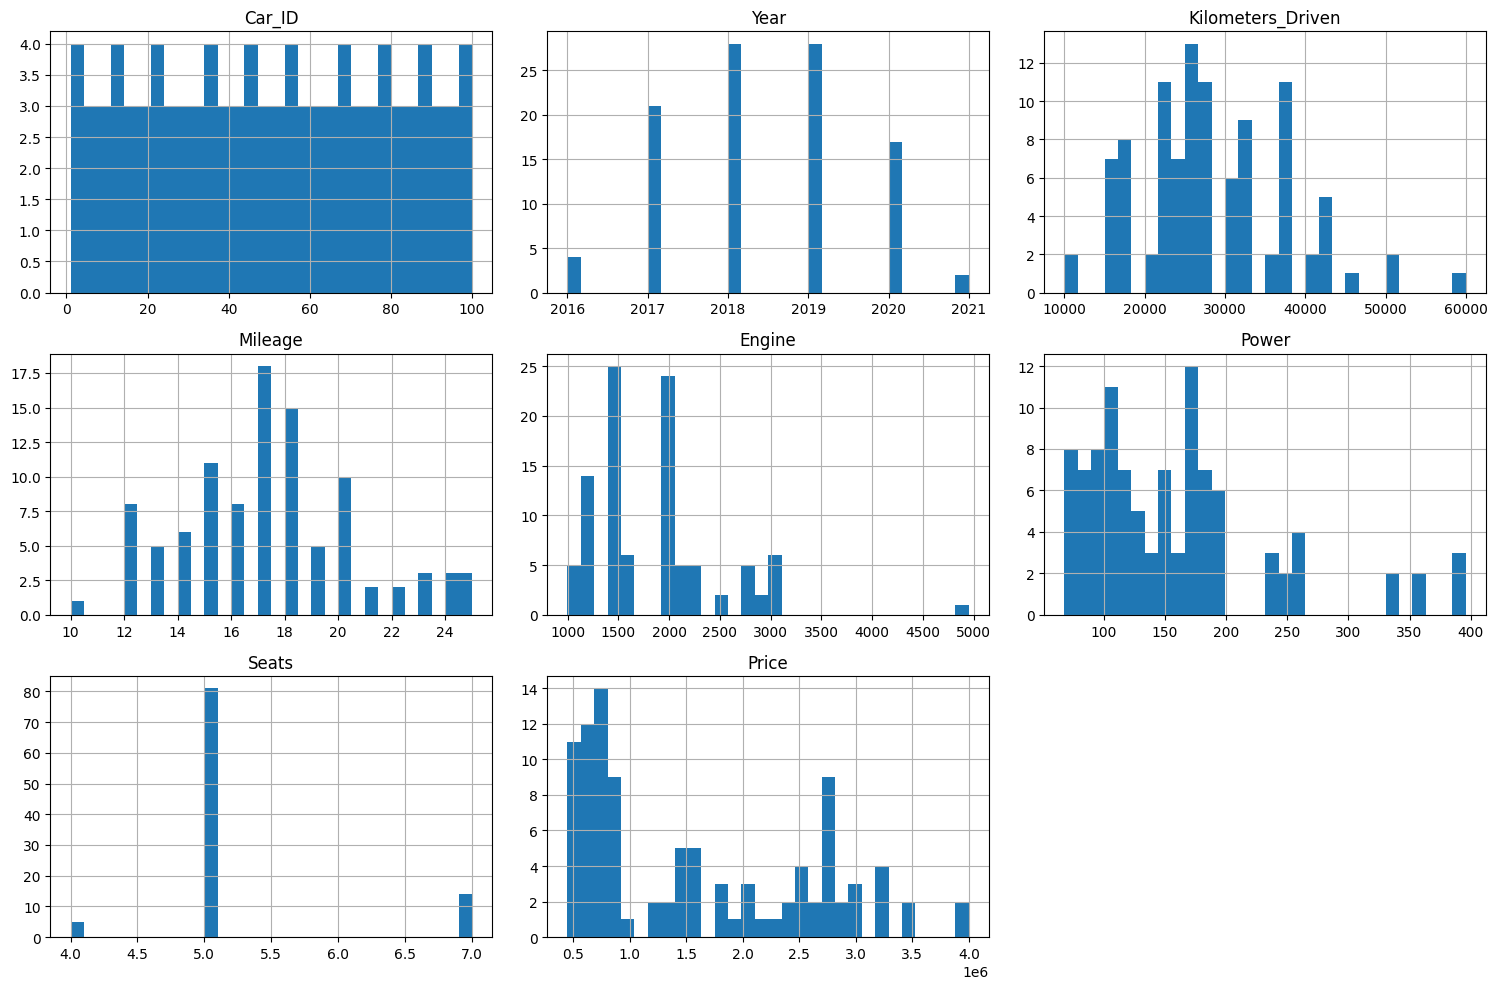

In [49]:
# Розподіл числових змінних
df[num_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

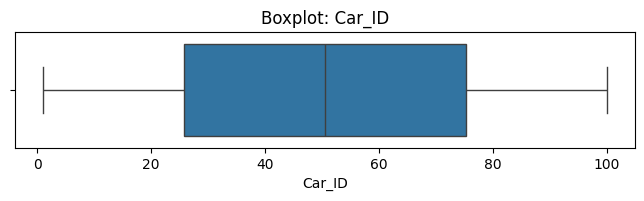

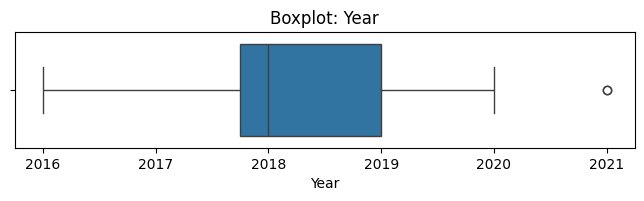

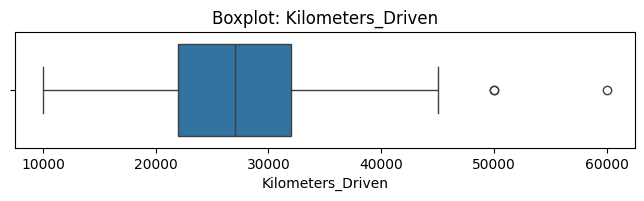

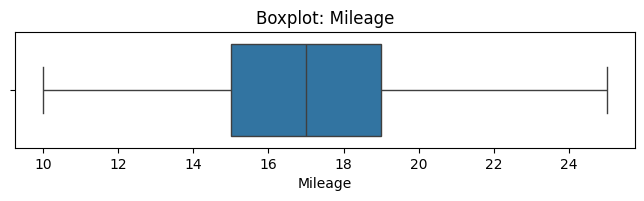

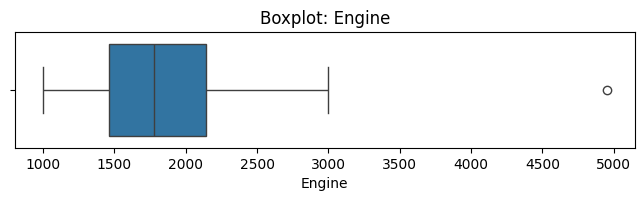

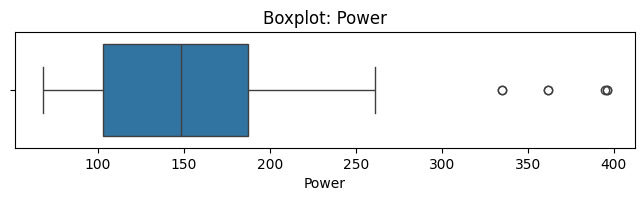

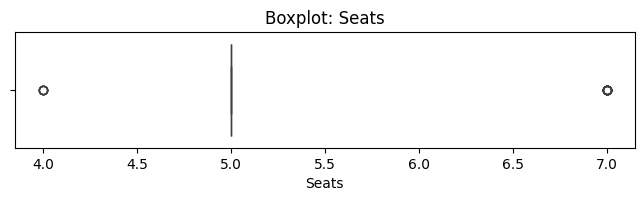

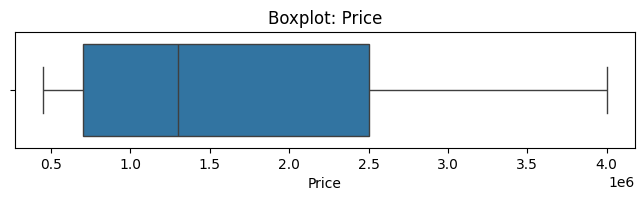

In [50]:
# Boxplot для виявлення викидів
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


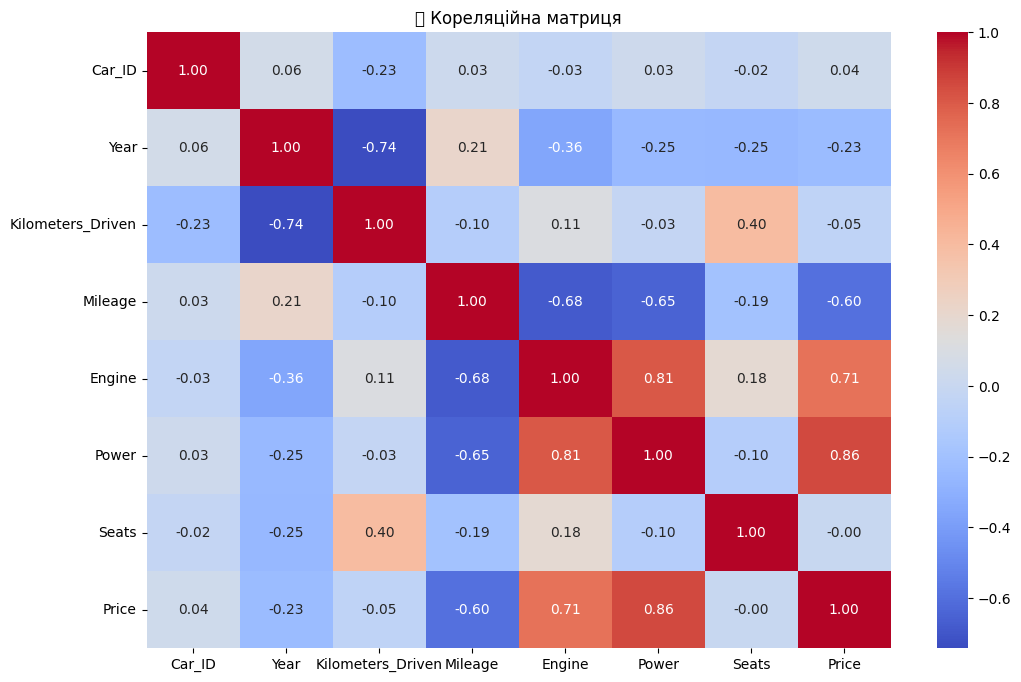

In [51]:
# Кореляція
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('📈 Кореляційна матриця')
plt.show()

In [52]:
if 'TARGET' in df.columns:
    for col in num_cols:
        if col != 'TARGET':
            plt.figure(figsize=(6,4))
            sns.boxplot(data=df, x='TARGET', y=col)
            plt.title(f'{col} vs TARGET')
            plt.show()

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [53]:
from sklearn.model_selection import train_test_split

# Відокремлюємо ознаки (всі колонки крім Price) і ціль (Price)
X = df.drop('Price', axis=1)  # ознаки
y = df['Price']               # цільова змінна

# Ділимо на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,    # 20% в тест
                                                    random_state=12)  # фіксуємо для відтворюваності


In [54]:
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)

Форма X_train: (80, 12)
Форма X_test: (20, 12)
Форма y_train: (80,)
Форма y_test: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

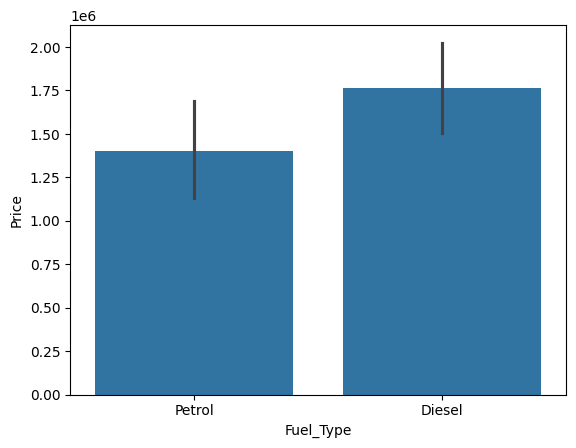

In [55]:
sns.barplot(data=df, x='Fuel_Type', y='Price');

In [56]:
fuel_type_code = {'Petrol': 1, 'Diesel': 0}
df['Fuel_Type_code'] = df['Fuel_Type'].map(fuel_type_code)

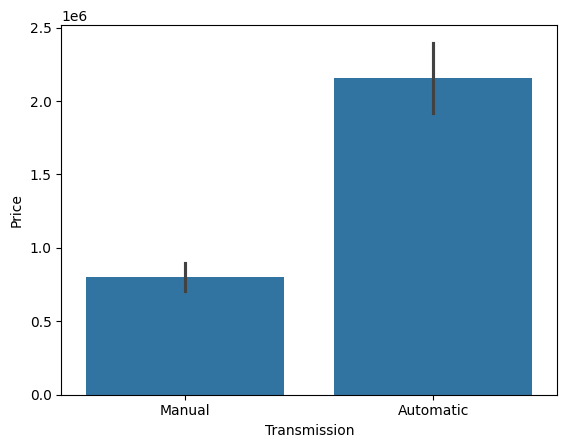

In [57]:
sns.barplot(data=df, x='Transmission', y='Price');

In [58]:
transmission_code = {'Automatic': 1, 'Manual': 0}
df['Transmission_code'] = df['Transmission'].map(transmission_code)

In [59]:
display(df[['Fuel_Type', 'Fuel_Type_code', 'Transmission', 'Transmission_code']].head())

,Fuel_Type,Fuel_Type_code,Transmission,Transmission_code
0,Petrol,1,Manual,0
1,Petrol,1,Automatic,1
2,Petrol,1,Automatic,1
3,Diesel,0,Manual,0
4,Diesel,0,Automatic,1


<Axes: xlabel='Brand', ylabel='Price'>

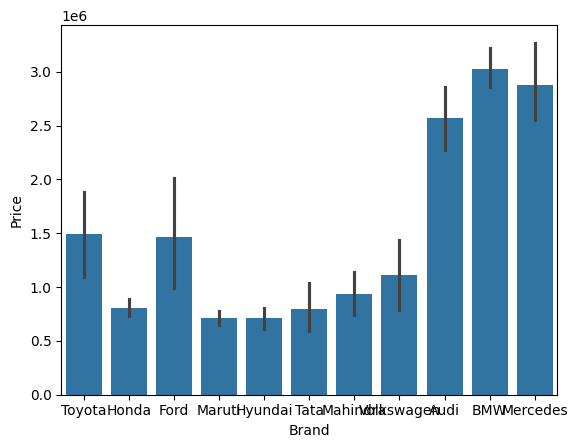

In [60]:
sns.barplot(data=df, x='Brand', y='Price')

In [61]:
from sklearn.preprocessing import OneHotEncoder

#Створення енкодера
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#fit - лише на TRAIN
ohe.fit(X_train[['Brand']])

#Трансформуємо X_train
brand_train_ohe = pd.DataFrame(
    ohe.transform(X_train[['Brand']]),
    columns=ohe.get_feature_names_out(['Brand']),
    index=X_train.index
)

#Трансформуємо X_test
brand_test_ohe = pd.DataFrame(
    ohe.transform(X_test[['Brand']]),
    columns=ohe.get_feature_names_out(['Brand']),
    index=X_test.index
)

#Видаляємо стару колонку 'Brand'
X_train = X_train.drop('Brand', axis=1)
X_test = X_test.drop('Brand', axis=1)

#Додаємо нові закодовані колонки
X_train = pd.concat([X_train, brand_train_ohe], axis=1)
X_test = pd.concat([X_test, brand_test_ohe], axis=1)


In [62]:
"""from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['Brand']])
enc.categories_"""

"from sklearn import preprocessing\nenc = preprocessing.OneHotEncoder()\nenc.fit(df[['Brand']])\nenc.categories_"

In [63]:
"""one_hot = enc.transform(df[['Brand']]).toarray()
one_hot"""

"one_hot = enc.transform(df[['Brand']]).toarray()\none_hot"

In [64]:
"""enc.categories_[0]"""

'enc.categories_[0]'

In [65]:
"""df[enc.categories_[0]] = one_hot"""

'df[enc.categories_[0]] = one_hot'

In [66]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_code,Transmission_code
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,1,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,0,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,0,1


In [67]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [68]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [69]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [70]:
train_data = pd.concat([X_train_num, y_train], axis=1)

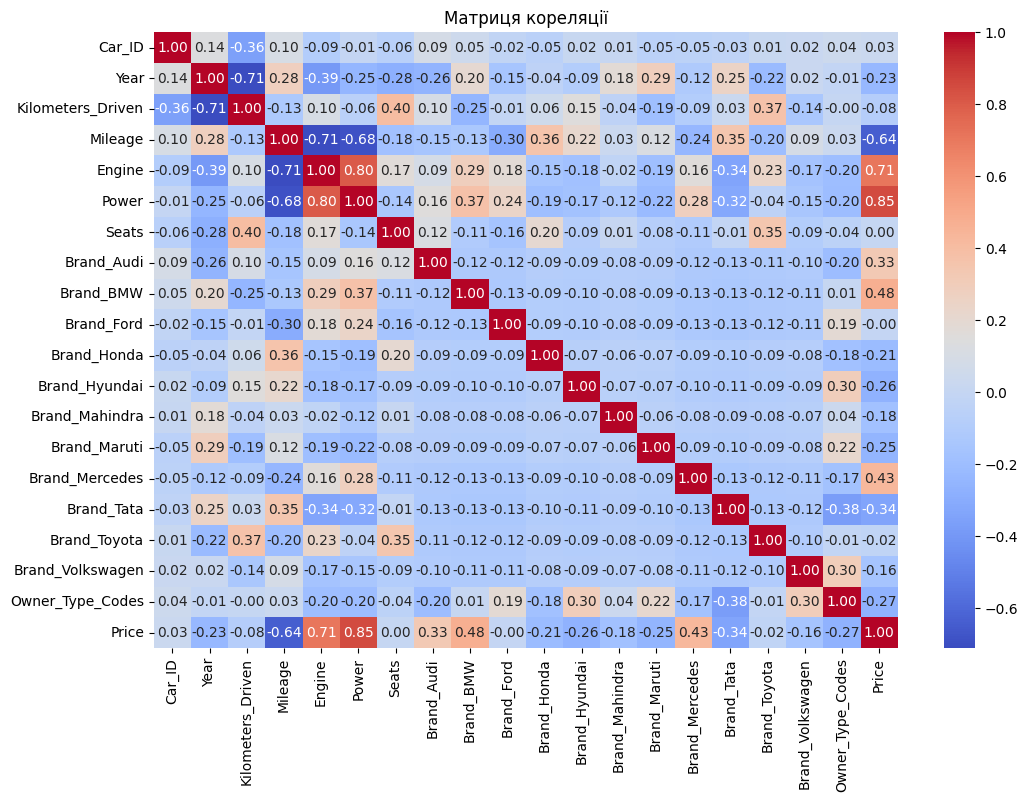

In [71]:
plt.figure(figsize=(12, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

In [72]:
corr_matrix['Price'].abs().sort_values(ascending=False)

,Price
Price,1.000000
Power,0.849137
Engine,0.710561
Mileage,0.638404
Brand_BMW,0.477522
Brand_Mercedes,0.431606
Brand_Tata,0.341815
Brand_Audi,0.328858
Owner_Type_Codes,0.265537
Brand_Hyundai,0.263022


Висновок:

Найсильніше з ціною автомобіля корелює змінна Power (0.85), що логічно — потужніші авто зазвичай дорожчі. Також спостерігається сильна позитивна кореляція з Engine (0.71), оскільки об'єм двигуна часто впливає на ціну.
Водночас Mileage має сильну негативну кореляцію з ціною (–0.64): чим більша витрата пального, тим нижча ціна — ймовірно через меншу ефективність.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [73]:
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE на train: {rmse_train:.2f}")
print(f"RMSE на test: {rmse_test:.2f}")

RMSE на train: 252657.28
RMSE на test: 248249.61


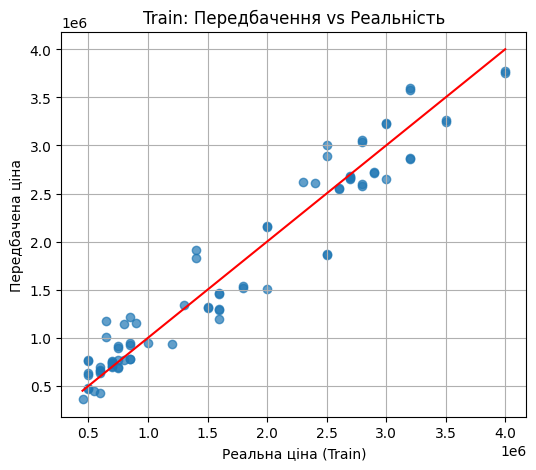

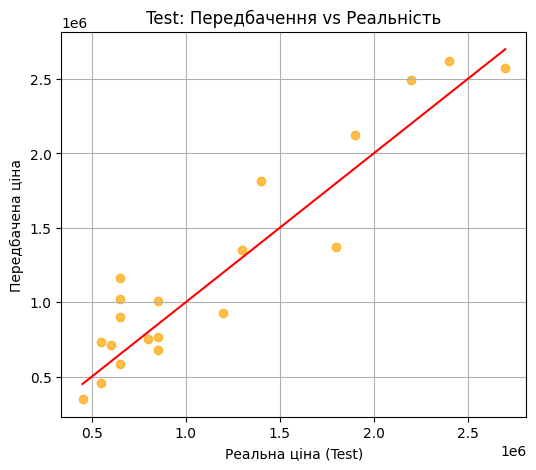

In [78]:
# Графік для TRAIN
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.xlabel("Реальна ціна (Train)")
plt.ylabel("Передбачена ціна")
plt.title("Train: Передбачення vs Реальність")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.grid(True)
plt.show()

# Графік для TEST
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange')
plt.xlabel("Реальна ціна (Test)")
plt.ylabel("Передбачена ціна")
plt.title("Test: Передбачення vs Реальність")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

Висновок:

Модель лінійної регресії показує високу точність на тренувальних даних, що підтверджується точками поблизу діагоналі на графіку.
На тестових даних точність дещо нижча, що сигналізує про можливе переобучення або потребу в додаткових ознаках/немасштабованих даних.
Тим не менш, загальна тенденція збережена, і модель адекватно прогнозує ціни автомобілів.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [79]:
from sklearn.preprocessing import StandardScaler

# Створюємо скейлер
scaler = StandardScaler()

# Навчаємо скейлер на тренувальних даних
X_train_scaled = scaler.fit_transform(X_train)

# Масштабуємо тестові
X_test_scaled = scaler.transform(X_test)


In [80]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
# Створимо таблицю коефіцієнтів
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_scaled.coef_
})

# Сортуємо за абсолютним значенням коефіцієнтів
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

display(coef_df[['Feature', 'Coefficient']])


,Feature,Coefficient
5,Power,460238.563128
14,Brand_Mercedes,267134.605117
8,Brand_BMW,263621.151556
7,Brand_Audi,219326.973011
15,Brand_Tata,-164553.287214
11,Brand_Hyundai,-134316.487395
12,Brand_Mahindra,-123408.855189
10,Brand_Honda,-117427.497575
13,Brand_Maruti,-115590.838380
9,Brand_Ford,-99983.523443


Висновки:

Найвпливовіша ознака: Power — чим потужніше авто, тим воно дорожче.

Важливі бренди: Mercedes, BMW, Audi підвищують ціну, Tata — знижує.

Mileage має негативний ефект — логічно: авто з високим розходом пального коштує менше.

Year (рік випуску) має позитивний ефект — новіші авто дорожчі.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [82]:
import statsmodels.api as sm

In [83]:
X_train_scaled_const = sm.add_constant(X_train_scaled)

In [84]:
model_sm = sm.OLS(y_train, X_train_scaled_const).fit()

In [85]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     53.36
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           1.60e-30
Time:                        10:48:25   Log-Likelihood:                -1108.7
No. Observations:                  80   AIC:                             2255.
Df Residuals:                      61   BIC:                             2301.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   3.23e+04     51.933      0.0

 Список статистично значущих ознак:

x6

x8

x9

x11

x12

x13

x14

x15

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [86]:
significant_indices = [5, 7, 8, 10, 11, 12, 13, 14]
significant_features = X_train.columns[significant_indices]

In [87]:
import statsmodels.api as sm

# Вибираємо значущі ознаки
X_train_significant = X_train_scaled[:, significant_indices]  # це якщо у тебе numpy-масив
X_train_significant = sm.add_constant(X_train_significant)  # додаємо константу

# Тренуємо модель
model_significant = sm.OLS(y_train, X_train_significant).fit()

# Виводимо звіт
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     98.40
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           2.58e-35
Time:                        10:50:31   Log-Likelihood:                -1121.7
No. Observations:                  80   AIC:                             2261.
Df Residuals:                      71   BIC:                             2283.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   3.53e+04     47.602      0.0

Висновки:

R-squared зменшився лише на 0.023, а Adjusted — на 0.015. Це дуже невелика втрата точності.

Модель стала простішою — менше ознак → менше ризиків переобучення (overfitting).

Залишились найбільш статистично значущі чинники, які реально впливають на ціну авто.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [90]:
# Створюємо DataFrame з масштабованого масиву
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [91]:
# Назви ознак, які мають p-value < 0.25
selected_features = [
    'Power',               # x1
    'Brand_Mercedes',      # x2
    'Brand_BMW',           # x3
    'Brand_Tata',          # x5
    'Brand_Hyundai',       # x6
    'Brand_Audi',          # x7
    'Brand_Mahindra',      # x8
    'Brand_Honda',         # x10
    'Brand_Maruti',        # x11
    'Brand_Toyota',        # x12
    'Owner_Type_Codes',    # x13
    'Brand_Volkswagen',    # x14
    'Year',                # x15
    'Mileage'              # x16
]

In [92]:
# Вибираємо лише ці ознаки
X_selected = X_train_scaled_df[selected_features]

# Додаємо стовпець константи
X_selected = sm.add_constant(X_selected)

# Навчаємо модель
model_selected = sm.OLS(y_train, X_selected).fit()

# Виводимо summary
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     65.82
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           8.27e-33
Time:                        10:56:13   Log-Likelihood:                -1112.6
No. Observations:                  80   AIC:                             2255.
Df Residuals:                      65   BIC:                             2291.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.68e+06   3.29e+04  

Яку модель краще лишити?
Модель із завдання 10:

Має високу точність (Adj. R² = 0.920).

Менше шуму, ніж модель із завдання 7.

Гнучкий підхід до відбору ознак дозволяє трохи знизити жорсткість.

Модель із завдання 10 — найкращий баланс точності та стабільності.